segmentation就是在像素里二分类，一般用来找出边或者区域。找出边可以直接用一些边检验滤波器之类的东西，区域则主要用一些花式聚类的方法。语义分割以有监督的方式做这事，但需要很多数据。

segmentation生成的二值mask可以用来后续的二值形态学操作，如找出某些中心（骨骼）等，然后这些标准化的边可以用来生成模板或者计算其他具有什么不变性的模板。

In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import imageio

In [3]:
img_rgb = imageio.imread('ab.jpg')


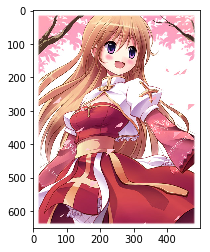

In [4]:
plt.imshow(img_rgb)

In [5]:
img_rgb.shape

(650, 498, 3)

In [6]:
img = imageio.imread('ab.jpg', pilmode='L')

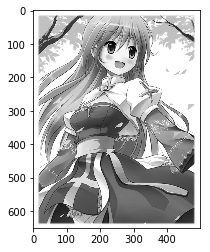

In [7]:
plt.imshow(img, cmap="gray")

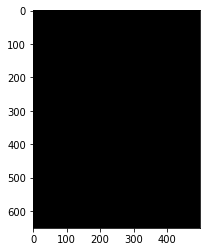

In [8]:
plt.imshow(img // 2**8, cmap="gray")

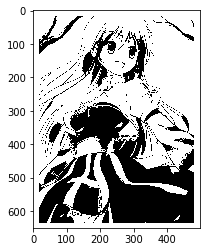

In [9]:
plt.imshow(img // 2**7, cmap="gray")

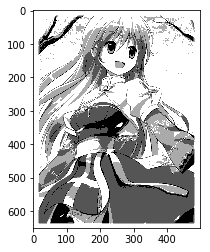

In [10]:
plt.imshow(img // 2**6, cmap="gray")

In [11]:
import cv2

In [12]:
cv2.ximgproc.segmentation.createSelectiveSearchSegmentation?

In [14]:
cv2.ximgproc.segmentation.createGraphSegmentation?

In [ ]:
gs = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
gs.setBaseImage(img)


In [ ]:
rects = gs.process()

In [15]:
from skimage import data, segmentation


In [ ]:
segmentation.